### A. Readme First
- Apabila kalian pengguna Ubuntu dari versi 14.04 hingga latest version, kalian bisa langsung menjalankan `Cell` &#8594; `Run All`.
- Apabila kalian bukan salah satu pengguna Ubuntu versi 14.04 hingga latest version, diharapkan untuk mengunduh dan mengekstrasi `Tugas Lab 1 - Images` dan melakukan ekstrasi hasilnya tepat di sebelah `MRS-Lab 1-A-2006609645-A-2006560876.ipynb` lalu menjalankan `Cell` &#8594; `Run All`.

### B. Persiapan Lingkungan Laboratorium
- Melakukan _install package_/_dependency_ yang diperlukan untuk `Tugas Laboratorium 1` kali ini.
- Melakukan _import library_ yang akan digunakan pada `Tugas Laboratorium 1` kali ini.
- Mengunduh dan mengekstrasi dokumen pendukung untuk tugas ini.

#### 1. Instalasi _Package_/_Dependency_
_Install dependency_ tidaklah wajib. Tetapi bisa jadi ada beberapa _dependency_ di bawah ini yang belum terinstall.

In [1]:
pip install numpy scikit-image matplotlib gdown

  Using cached https://files.pythonhosted.org/packages/b8/e5/a64ef44a85397ba3c377f6be9c02f3cb3e18023f8c89850dd319e7945521/numpy-1.19.2-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/0e/ba/53e1bfbdfd0f94514d71502e3acea494a8b4b57c457adbc333ef386485da/scikit_image-0.17.2-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/cd/d6/8c4dfb23151d5a494c66ebbfdb5c8c433b44ec07fae52da5939fcda0943f/matplotlib-3.3.2-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/30/bf/92385b4262178ca22b34f82e0e09c2922eb351fe39f3cc7b8ba9ea555b41/Pillow-7.2.0-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/9b/cd/dc52755d30ba41c60243235460961fc28022e5b6731f16c268667625baea/networkx-2.5-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/42/6b/93a8ee61c6fbe20fa9c17928bd3b80484902b7fd454cecaffba42f5052cb/tifffile-2020.9.3-py3-none-any.whl
  Using 

#### 2. Melakukan _Import Library_ 

In [2]:
from skimage import color, exposure, filters, io, morphology, util
from skimage.transform import rescale
import matplotlib.pyplot as plt
import numpy as np
import os
import sys

#### 3. Unduh dan Ekstrasi Dokumen Pendukung

In [3]:
os.system('gdown https://drive.google.com/uc?id=1g_DXlxk-GD3RDqYoeXyNOr15_7Qxj1h-')
os.system('unzip Tugas\ Lab\ 2\ -\ Images.zip')

256

### C. Soal

1. [50] Diberikan citra `insect.jpg` yang berukuran $640 \times 451$ \
![insect.jpg](Tugas%20Lab%202%20-%20Images/insect.jpg)
    - [7.5] Terapkan _smoothing_ terhadap ketiga channel $\text{R}$, $\text{G}$ dan $\text{B}$ lalu tampilkan hasilnya sebagai satu citra.
    - [7.5] Terapkan _smoothing_ terhadap $\text{V}$ lalu tampilkan hasilnya, ubah citra $\text{HSV}$ menjadi $\text{RGB}$ terlebih dahulu sebelum ditampilkan.
    - [10] Ceritakan perbedaan dari citra awal, citra hasil _smoothing channel_ $\text{RGB}$ dan citra hasil _smoothing channel_ $\text{V}$.
    - [7.5] Terapkan _sharpening_ terhadap ketiga _channel_ $\text{R}$, $\text{G}$ dan $\text{B}$ lalu tampilkan hasilnya sebagai satu citra.
    - [7.5] Terapkan _sharpening_ terhadap _channel_ $\text{V}$ lalu tampilkan hasilnya, ubah citra
$\text{HSV}$ menjadi $\text{RGB}$ terlebih dahulu sebelum ditampilkan.
    - [10] Ceritakan perbedaan dari citra awal, citra hasil _sharpening channel_ $\text{RGB}$ dan citra hasil _sharpening channel_ $\text{V}$

##### a. Menerapkan smoothing ke channel $\text{R}$, $\text{G}$, $\text{B}$ 

In [4]:
basePath = 'Tugas Lab 2 - Images/'
def getPath(fileName):
    return basePath + fileName

(-0.5, 639.5, 450.5, -0.5)

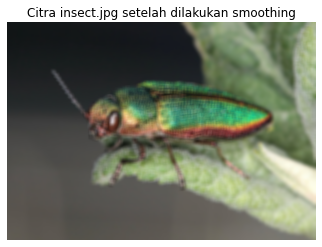

In [5]:
## Melakukan pembacaan citra
citra_insect = io.imread(getPath('insect.jpg'))
citra_insect = util.img_as_ubyte(citra_insect)
insect_rgb = citra_insect
citra_insect_R = citra_insect[:,:,0]
citra_insect_G = citra_insect[:,:,1]
citra_insect_B = citra_insect[:,:,2]

## Melakukan smoothing citra untuk tiap-tiap channel
citra_insect_R_smooth = filters.rank.mean(citra_insect_R, selem=morphology.square(9))
citra_insect_G_smooth = filters.rank.mean(citra_insect_G, selem=morphology.square(9))
citra_insect_B_smooth = filters.rank.mean(citra_insect_B, selem=morphology.square(9))

## Menggabungkan partisi citra smoothing menjadi sebuah kesatuan
citra_insect_smooth = util.img_as_ubyte(np.zeros(citra_insect.shape))
citra_insect_smooth[:,:,0] = citra_insect_R_smooth
citra_insect_smooth[:,:,1] = citra_insect_G_smooth
citra_insect_smooth[:,:,2] = citra_insect_B_smooth

## Menampilkan citra smoothing
plt.imshow(citra_insect_smooth)
plt.title('Citra insect.jpg setelah dilakukan smoothing')
plt.axis('off')

##### b. Smoothing terhadap $\text{V}$ pada $\text{HSV}$

(-0.5, 639.5, 450.5, -0.5)

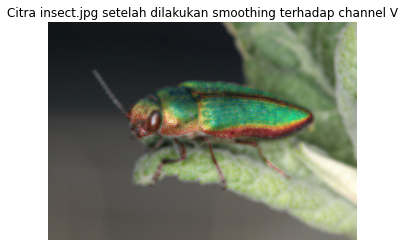

In [6]:
## Melakukan konversi citra ke HSV
citra_insect_HSV = util.img_as_ubyte(color.rgb2hsv(citra_insect))

## Melakukan partisi citra untuk tiap-tiap komponen HSV
citra_insect_H = citra_insect_HSV[:,:,0]
citra_insect_S = citra_insect_HSV[:,:,1]
citra_insect_V = citra_insect_HSV[:,:,2]

## Melakukan smoothing citra untuk channel V
citra_insect_V_smooth = filters.rank.mean(citra_insect_V, selem=morphology.square(9))

## Menggabungkan partisi citra smoothing menjadi sebuah kesatuan
citra_insect_RGB_from_HSV_smooth = util.img_as_ubyte(np.zeros(citra_insect.shape))
citra_insect_HSV_smooth = util.img_as_ubyte(color.rgb2hsv(citra_insect_RGB_from_HSV_smooth))
citra_insect_HSV_smooth[:,:,0] = citra_insect_H
citra_insect_HSV_smooth[:,:,1] = citra_insect_S
citra_insect_HSV_smooth[:,:,2] = citra_insect_V_smooth

## Melakukan konversi dari citra HSV menjadi citra RGB
citra_insect_RGB_from_HSV_smooth = color.hsv2rgb(citra_insect_HSV_smooth)

## Menampilkan citra smoothing
plt.imshow(citra_insect_RGB_from_HSV_smooth)
plt.title('Citra insect.jpg setelah dilakukan smoothing terhadap channel V')
plt.axis('off')

##### c. Perbedaan dari citra awal, citra hasil _smoothing channel_ $\text{RGB}$, dan citra hasil _smoothing channel_ $\text{V}$

(-0.5, 639.5, 450.5, -0.5)

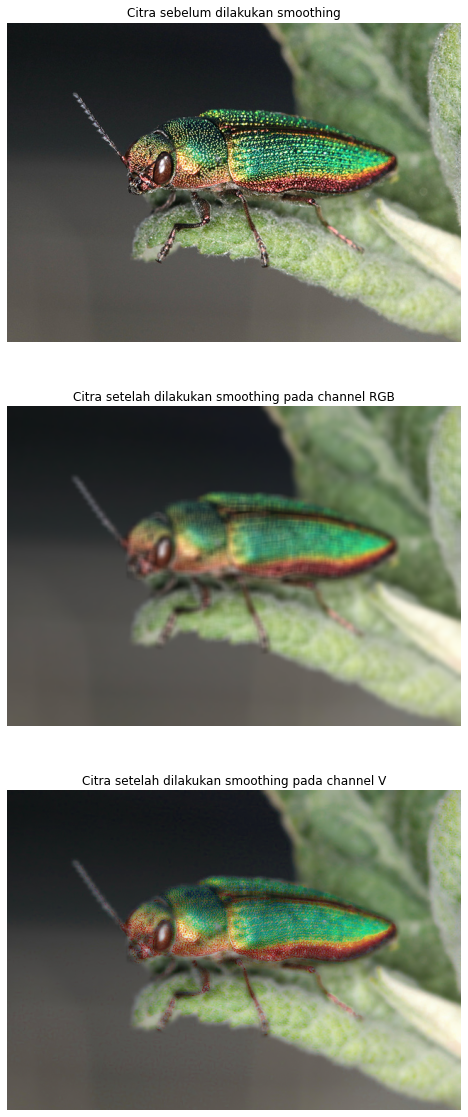

In [7]:
plt.subplots(figsize=(20,20))
## Plotting citra sebelum dilakukan smoothing
plt.subplot(3,1,1)
plt.imshow(citra_insect)
plt.title('Citra sebelum dilakukan smoothing')
plt.axis('off')

## Plotting citra setalah dilakukan smoothing pada channel RGB
plt.subplot(3,1,2)
plt.imshow(citra_insect_smooth)
plt.title('Citra setelah dilakukan smoothing pada channel RGB')
plt.axis('off')

## Plotting citra setalah dilakukan smoothing pada channel V
plt.subplot(3,1,3)
plt.imshow(citra_insect_RGB_from_HSV_smooth)
plt.title('Citra setelah dilakukan smoothing pada channel V')
plt.axis('off')

- Dari ketiga gambar tersebut terlihat bahwa pada citra awal **sebelum** dilakukan _smoothing_ terlihat cukup tebal dan juga menampilkan visual _Red_, _Green_, dan _Blue_ secara tegas.
- Setelah dilakukan _smoothing_ pada _channel_ $\text{RGB}$, citra menjadi tampak samar. Hal ini wajar dikarenakan terdapat gap antara pixel yang bersebelahan untuk setiap channel, sehingga warna akan cenderung "diratakan" untuk tiap-tiap channel, sehingga terlihat samar.
- Lalu untuk citra yang dilakukan _smoothing_ pada _channel_ $\text{V}$ memberikan kesan bahwa yang terang menjadi sangat terang, yang gelap menjadi sangat gelap. Hal ini terlihat bahwa ada _Red_ yang terlihat menonjol dibandingkan _Green_ dan _Blue_.

##### d. Menerapkan sharpening ke channel $\text{R}$, $\text{G}$, $\text{B}$ 

(-0.5, 639.5, 450.5, -0.5)

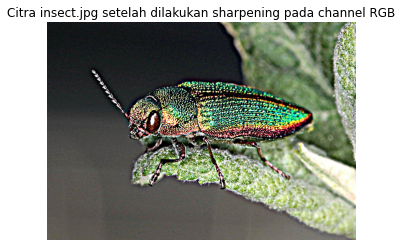

In [8]:
## Melakukan sharpening citra untuk tiap-tiap channel (asumsi menggunakan parameter radius dan amount sesuai pengantar pada scele)
citra_insect_R_sharp = util.img_as_ubyte(filters.unsharp_mask(citra_insect_R, radius=5, amount=2))
citra_insect_G_sharp = util.img_as_ubyte(filters.unsharp_mask(citra_insect_G, radius=5, amount=2))
citra_insect_B_sharp = util.img_as_ubyte(filters.unsharp_mask(citra_insect_B, radius=5, amount=2))

## Menggabungkan partisi citra smoothing menjadi sebuah kesatuan
citra_insect_sharp = util.img_as_ubyte(np.zeros(citra_insect.shape))
citra_insect_sharp[:,:,0] = citra_insect_R_sharp
citra_insect_sharp[:,:,1] = citra_insect_G_sharp
citra_insect_sharp[:,:,2] = citra_insect_B_sharp

## Menampilkan citra smoothing
plt.imshow(citra_insect_sharp)
plt.title('Citra insect.jpg setelah dilakukan sharpening pada channel RGB')
plt.axis('off')

##### e. Menerapkan sharpening ke channel $\text{V}$

(-0.5, 639.5, 450.5, -0.5)

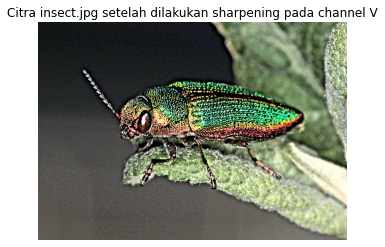

In [9]:
## Melakukan sharpening citra untuk tiap-tiap channel (asumsi menggunakan parameter radius dan amount sesuai pengantar pada scele)
citra_insect_V_sharp = util.img_as_ubyte(filters.unsharp_mask(citra_insect_V, radius=5, amount=2))

## Menggabungkan partisi citra smoothing menjadi sebuah kesatuan
citra_insect_RGB_from_HSV_sharp = util.img_as_ubyte(np.zeros(citra_insect.shape))
citra_insect_HSV_sharp = util.img_as_ubyte(color.rgb2hsv(citra_insect_RGB_from_HSV_sharp))
citra_insect_HSV_sharp[:,:,0] = citra_insect_H
citra_insect_HSV_sharp[:,:,1] = citra_insect_S
citra_insect_HSV_sharp[:,:,2] = citra_insect_V_sharp

## Melakukan konversi citra dari HSV ke RGB
citra_insect_RGB_from_HSV_sharp = color.hsv2rgb(citra_insect_HSV_sharp)

## Menampilkan citra sharpening channel V
plt.imshow(citra_insect_RGB_from_HSV_sharp)
plt.title('Citra insect.jpg setelah dilakukan sharpening pada channel V')
plt.axis('off')

##### f. Perbedaan dari citra awal, citra hasil _sharpening channel_ $\text{RGB}$, dan citra hasil _sharpening channel_ $\text{V}$

(-0.5, 639.5, 450.5, -0.5)

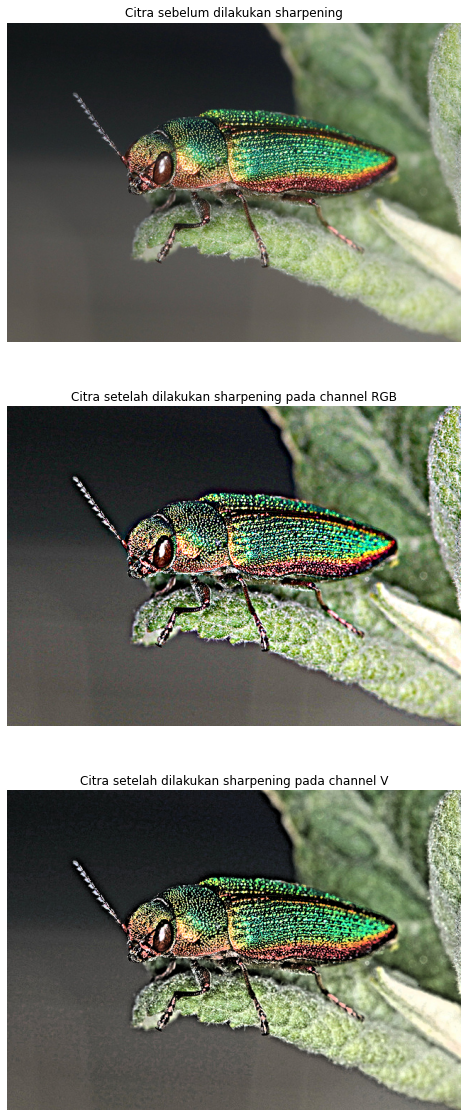

In [10]:
plt.subplots(figsize=(20,20))
## Plotting citra sebelum dilakukan smoothing
plt.subplot(3,1,1)
plt.imshow(citra_insect)
plt.title('Citra sebelum dilakukan sharpening')
plt.axis('off')

## Plotting citra setalah dilakukan smoothing pada channel RGB
plt.subplot(3,1,2)
plt.imshow(citra_insect_sharp)
plt.title('Citra setelah dilakukan sharpening pada channel RGB')
plt.axis('off')

## Plotting citra setalah dilakukan smoothing pada channel V
plt.subplot(3,1,3)
plt.imshow(citra_insect_RGB_from_HSV_sharp)
plt.title('Citra setelah dilakukan sharpening pada channel V')
plt.axis('off')

- Bila kita tinjau citra yang dilakukan _sharpening_ pada _channel_ $\text{RGB}$ dan yang dilakukan _sharpening_ pada _channel_ $\text{V}$ memilki hasil citra yang mempertajam kedua pixel antar dua warna yang contrast.
- Bila kita tinjau antar kedua hasil _sharpening_, sekilas citra yang dihasilkan tidak memberikan hasil yang berbeda. Tetapi bila kita tinjau dari warna hitam antar keduanya, terlihat bahwa hasil _sharpening_ pada _channel_ $\text{RGB}$ menghasilkan penajaman warna hitam lebih banyak dibandingkan hasil _sharpening_ pada _channel_ $\text{V}$. Berdasarkan teori hal ini disebabkan oleh citra yang dihasilkan menggunakan _sharpening_ pada ketiga _channel_ $\text{RGB}$ akan menyebabkan piksel yang berada pada _boundary_ antar dua warna yang _contrast_ akan menghasilkan warna baru campuran antara dua _boundary_ untuk tiap-tiap _channel_. Lain halnya _sharpening_ pada _channel_ $\text{V}$, penajaman hanya dilakukan pada bagian _brightness_ atau _efek cahaya saja_, sehingga pixel hanya berubah ketajaman _brightness_-nya saja.

2. [50] Diberikan citra `bird.jpg` dengan ukuran $1280 \times 914$ berikut ini \
![bird.jpg](Tugas%20Lab%202%20-%20Images/bird.jpg)
    - [7.5] Terapkan _contrast stretching_ terhadap ketiga _channel_ $\text{R}$, $\text{G}$ dan $\text{B}$ lalu tampilkan hasilnya sebagai satu citra.
    - [7.5] Terapkan _contrast stretching_ terhadap _channel_ $\text{V}$ lalu tampilkan hasilnya, ubah citra $\text{HSV}$ menjadi $\text{RGB}$ terlebih dahulu sebelum ditampilkan.
    - [10] Ceritakan perbedaan dari citra awal, citra hasil _contrast stretching channel_ $\text{RGB}$ dan citra hasil _contrast stretching channel_ $\text{V}$ (petunjuk: gunakan histogram untuk menunjukkan perbedaan).
    - [7.5] Terapkan _histogram equalization_ terhadap ketiga _channel_ $\text{R}$, $\text{G}$ dan $\text{B}$ lalu tampilkan hasilnya sebagai satu citra.
    - [7.5] Terapkan _histogram equalization_ terhadap _channel_ $\text{V}$ lalu tampilkan hasilnya
sebagai, ubah citra $\text{HSV}$ menjadi $\text{RGB}$ terlebih dahulu sebelum ditampilkan.
    - [10] Ceritakan perbedaan dari citra awal, citra hasil _histogram equalization channel_ $\text{RGB}$ dan citra hasil _histogram equalization channel_ $\text{V}$ (petunjuk: gunakan histogram untuk menunjukkan perbedaan).

##### a. Contrast stretching menggunakan channel $\text{RGB}$ 

In [11]:
## Melakukan pembacaan citra bird.jpg
citra_bird_RGB = io.imread(getPath('bird.jpg'))
citra_bird_RGB = util.img_as_ubyte(citra_bird_RGB)

## Melakukan partisi citra bird.jpg untuk tiap-tiap channel RGB
citra_bird_R = citra_bird_RGB[:,:,0]
citra_bird_G = citra_bird_RGB[:,:,1]
citra_bird_B = citra_bird_RGB[:,:,2]

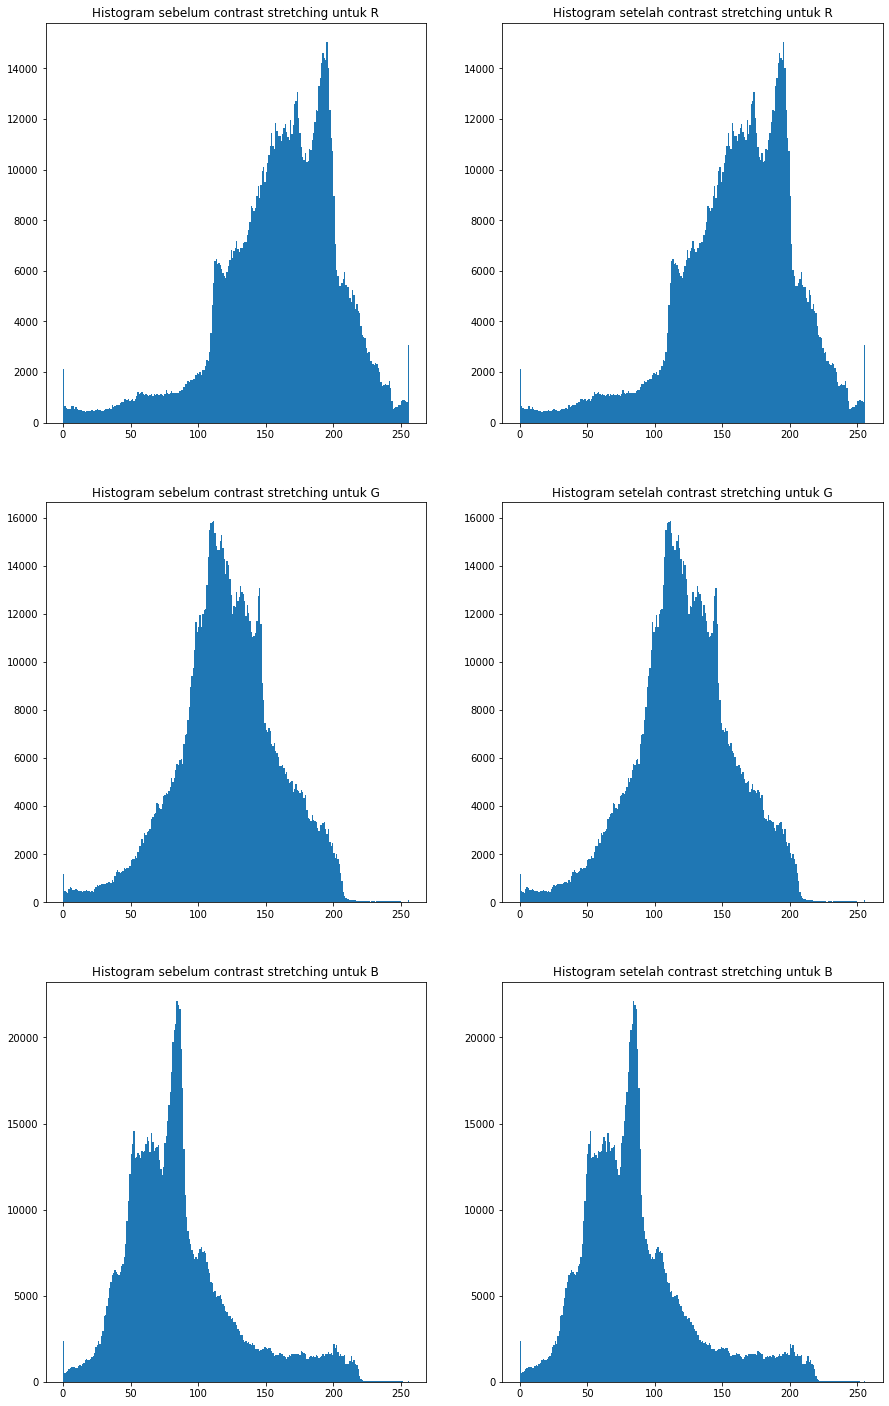

In [12]:
partisi_citra_bird_RGB = [citra_bird_R, citra_bird_G, citra_bird_B]
partisi_citra_bird_RGB_cs = []
labels = ['R', 'G', 'B']

## Menginisialisi subplot yang akan dihasilkan
plt.subplots(figsize=(15,25))

cnt = 1
for x in partisi_citra_bird_RGB:
    mn = min(x.flatten())
    mx = max(x.flatten())
    b = int(np.floor(255 / (mx-mn)))
    x_cs = (x - mn) * b
    
    ## Menyimpan hasil contrast stretching
    partisi_citra_bird_RGB_cs.append(x_cs)
    
    ## Menampilkan histogram sebelum dilakukan contrast stretching
    plt.subplot(len(partisi_citra_bird_RGB), 2, cnt)
    plt.title('Histogram sebelum contrast stretching untuk %s' % (labels[cnt//2]))
    plt.hist(x.flatten(), 256, range=(0,256))
    
    ## Menampilkan histogram setelah dilakukan contrast stretching
    plt.subplot(len(partisi_citra_bird_RGB), 2, cnt+1)
    plt.title('Histogram setelah contrast stretching untuk %s' % (labels[cnt//2]))
    plt.hist(x_cs.flatten(), 256, range=(0,256))
    
    cnt += 2

(-0.5, 1279.5, 913.5, -0.5)

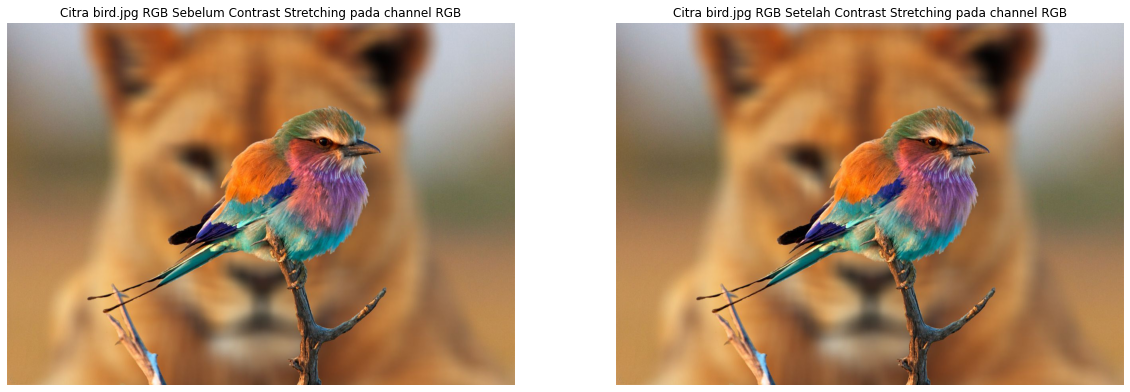

In [13]:
## Menampilkan citra RGB sebelum dan sesudah contrast stretching pada channel RGB
citra_bird_RGB_cs = util.img_as_ubyte(np.zeros(citra_bird_RGB.shape))
citra_bird_RGB_cs[:,:,0] = partisi_citra_bird_RGB_cs[0]
citra_bird_RGB_cs[:,:,1] = partisi_citra_bird_RGB_cs[1]
citra_bird_RGB_cs[:,:,2] = partisi_citra_bird_RGB_cs[2]

plt.subplots(figsize=(20,10))
plt.subplot(1,2,1)
plt.title('Citra bird.jpg RGB Sebelum Contrast Stretching pada channel RGB')
plt.imshow(citra_bird_RGB)
plt.axis('off')

plt.subplot(1,2,2)
plt.title('Citra bird.jpg RGB Setelah Contrast Stretching pada channel RGB')
plt.imshow(citra_bird_RGB_cs)
plt.axis('off')

##### b. Contrast stretching menggunakan channel $\text{V}$ 

In [14]:
## Melakukan partisi citra bird.jpg untuk tiap-tiap channel HSV
citra_bird_HSV = util.img_as_ubyte(color.rgb2hsv(citra_bird_RGB))
citra_bird_H = citra_bird_HSV[:,:,0]
citra_bird_S = citra_bird_HSV[:,:,1]
citra_bird_V = citra_bird_HSV[:,:,2]

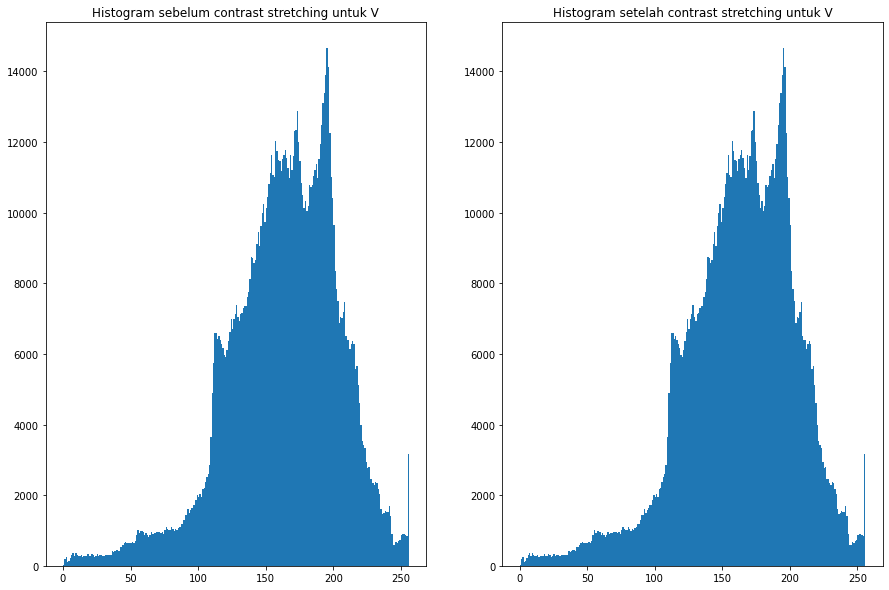

In [15]:
partisi_citra_bird_HSV = [citra_bird_V]
partisi_citra_bird_HSV_cs = []
labels = ['V']

## Menginisialisi subplot yang akan dihasilkan
plt.subplots(figsize=(15,10))

cnt = 1
for x in partisi_citra_bird_HSV:
    mx = max(x.flatten())
    b = int(np.floor(255 / (mx-mn)))
    x_cs = (x - mn) * b
    
    ## Menyimpan hasil contrast stretching
    partisi_citra_bird_HSV_cs.append(util.img_as_ubyte(x_cs))
    
    ## Menampilkan histogram sebelum dilakukan contrast stretching
    plt.subplot(len(partisi_citra_bird_HSV), 2, cnt)
    plt.title('Histogram sebelum contrast stretching untuk %s' % (labels[cnt//2]))
    plt.hist(x.flatten(), 256, range=(0,256))
    
    ## Menampilkan histogram setelah dilakukan contrast stretching
    plt.subplot(len(partisi_citra_bird_HSV), 2, cnt+1)
    plt.title('Histogram setelah contrast stretching untuk %s' % (labels[cnt//2]))
    plt.hist(x_cs.flatten(), 256, range=(0,256))
    
    cnt += 2

(-0.5, 1279.5, 913.5, -0.5)

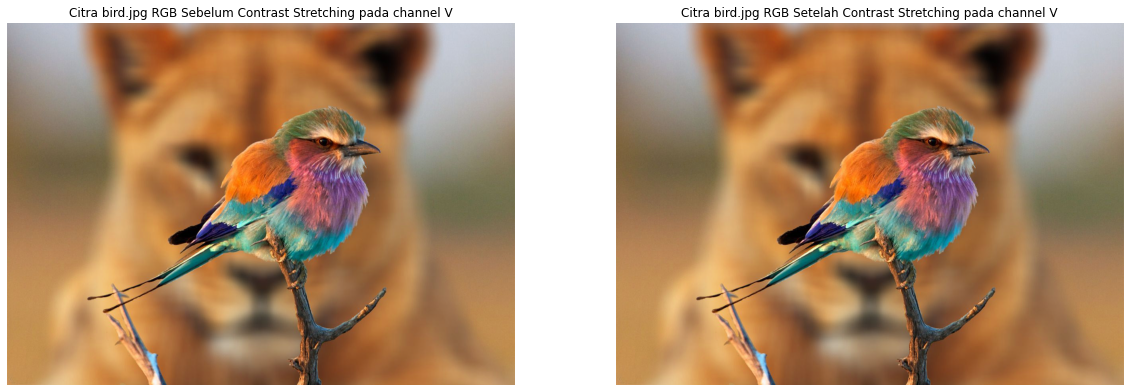

In [16]:
## Menampilkan citra HSV sebelum dan sesudah contrast stretching pada channel V
citra_bird_HSV_cs = util.img_as_ubyte(color.rgb2hsv(np.zeros(citra_bird_RGB.shape)))
citra_bird_HSV_cs[:,:,0] = citra_bird_H
citra_bird_HSV_cs[:,:,1] = citra_bird_S
citra_bird_HSV_cs[:,:,2] = partisi_citra_bird_HSV_cs[0]
citra_bird_HSV_cs = color.hsv2rgb(citra_bird_HSV_cs)

plt.subplots(figsize=(20,10))
plt.subplot(1,2,1)
plt.title('Citra bird.jpg RGB Sebelum Contrast Stretching pada channel V')
plt.imshow(color.hsv2rgb(citra_bird_HSV))
plt.axis('off')

plt.subplot(1,2,2)
plt.title('Citra bird.jpg RGB Setelah Contrast Stretching pada channel V')
plt.imshow(citra_bird_HSV_cs)
plt.axis('off')

##### c. Perbedaan dari citra awal, citra hasil _contrast stretching channel_ $\text{RGB}$, dan citra hasil _contrast stretching channel_ $\text{V}$

- Bila kita meninjau histogram untuk tiap-tiap channel RGB ataupun V, baik sebelum dan sesudah, terlihat bahwa hasil contrast stretching hampir tidak memberikan efek ke citra, atau bisa dibilang hasilnya hampi sama saja, baik sebelum dilakukan _contrast strecthing_ ataupun sesudah _contrast stretching_. Hal ini dikarenakan range nilai sebelum _contrast streching_ sudah mendekati range $[0,255]$. Sehingga, apabila dilakukan _contrast stretching_, hal yang akan di-_stretch_ hampir tidak terlihat.

##### d. Histogram Equalization menggunakan channel $\text{RGB}$ 

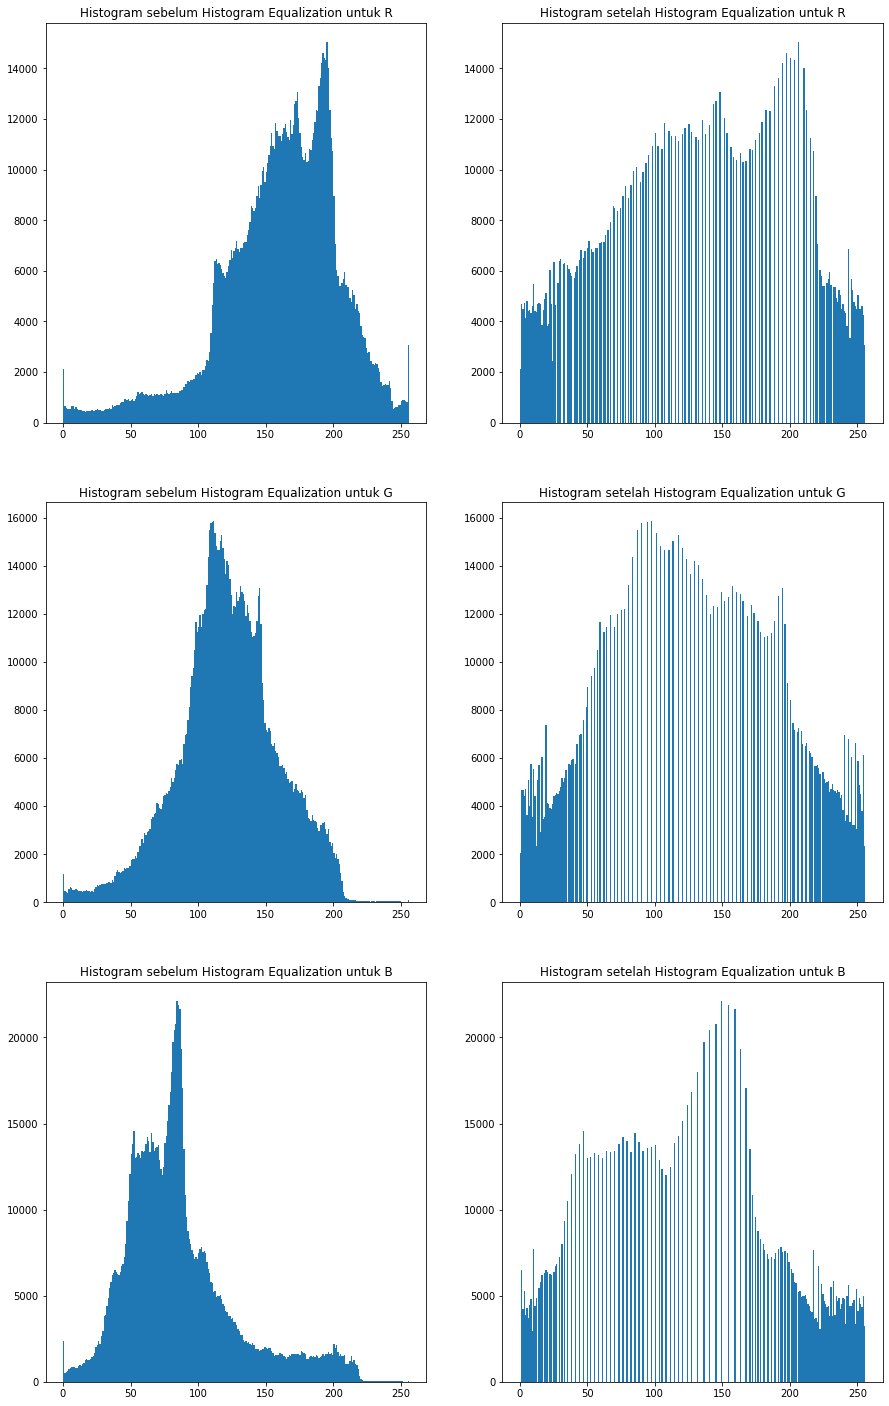

In [17]:
partisi_citra_bird_RGB_he = []
labels = ['R', 'G', 'B']

## Menginisialisi subplot yang akan dihasilkan
plt.subplots(figsize=(15,25))

cnt = 1
for x in partisi_citra_bird_RGB:
    x_he = util.img_as_ubyte(exposure.equalize_hist(x))
    
    ## Menyimpan hasil Histogram Equalization
    partisi_citra_bird_RGB_he.append(x_he)
    
    ## Menampilkan histogram sebelum dilakukan Histogram Equalization
    plt.subplot(len(partisi_citra_bird_RGB), 2, cnt)
    plt.title('Histogram sebelum Histogram Equalization untuk %s' % (labels[cnt//2]))
    plt.hist(x.flatten(), 256, range=(0,256))
    
    ## Menampilkan histogram setelah dilakukan Histogram Equalization
    plt.subplot(len(partisi_citra_bird_RGB), 2, cnt+1)
    plt.title('Histogram setelah Histogram Equalization untuk %s' % (labels[cnt//2]))
    plt.hist(x_he.flatten(), 256, range=(0,256))
    
    cnt += 2

(-0.5, 1279.5, 913.5, -0.5)

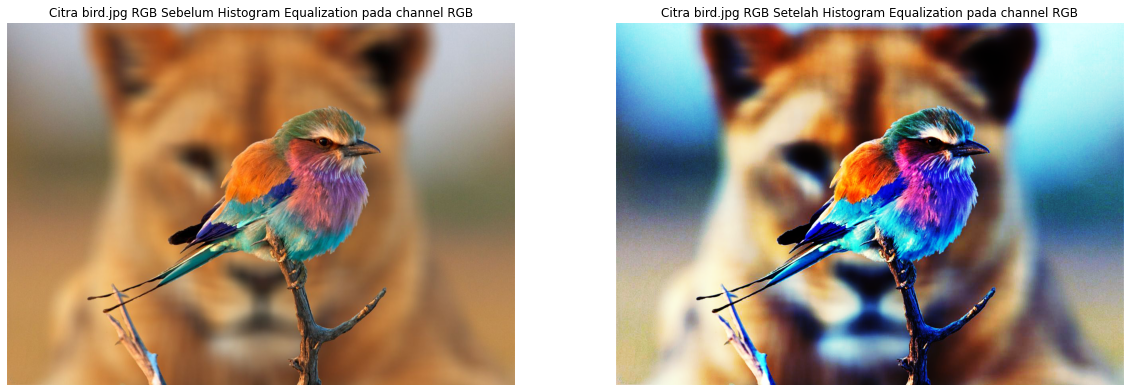

In [18]:
## Menampilkan citra RGB sebelum dan sesudah histogram equalization pada channel RGB
citra_bird_RGB_he = util.img_as_ubyte(np.zeros(citra_bird_RGB.shape))
citra_bird_RGB_he[:,:,0] = partisi_citra_bird_RGB_he[0]
citra_bird_RGB_he[:,:,1] = partisi_citra_bird_RGB_he[1]
citra_bird_RGB_he[:,:,2] = partisi_citra_bird_RGB_he[2]

plt.subplots(figsize=(20,10))
plt.subplot(1,2,1)
plt.title('Citra bird.jpg RGB Sebelum Histogram Equalization pada channel RGB')
plt.imshow(citra_bird_RGB)
plt.axis('off')

plt.subplot(1,2,2)
plt.title('Citra bird.jpg RGB Setelah Histogram Equalization pada channel RGB')
plt.imshow(citra_bird_RGB_he)
plt.axis('off')

##### e. Histogram Equalization menggunakan channel $\text{HSV}$ 

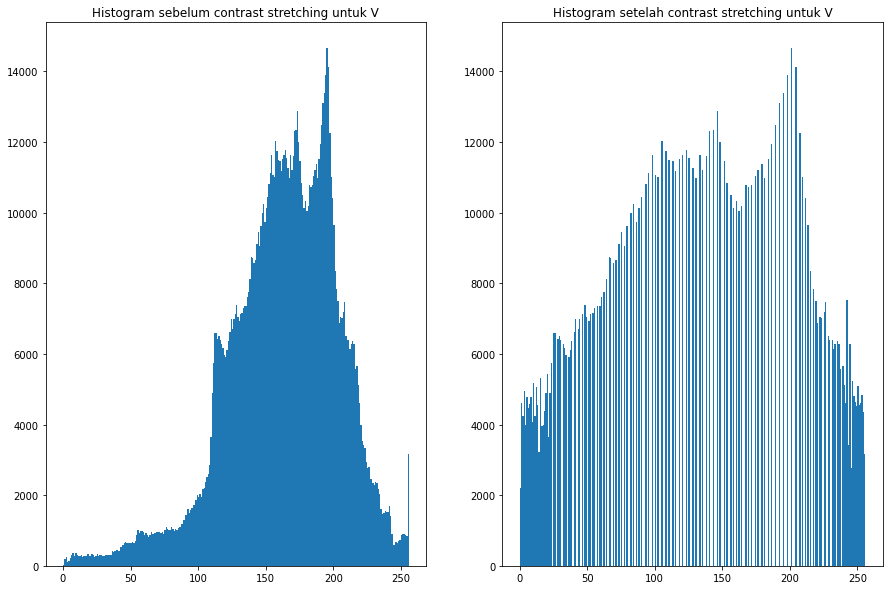

In [19]:
partisi_citra_bird_HSV_he = []
labels = ['V']

## Menginisialisi subplot yang akan dihasilkan
plt.subplots(figsize=(15,10))

cnt = 1
for x in partisi_citra_bird_HSV:
    x_he = util.img_as_ubyte(exposure.equalize_hist(x))
    
    ## Menyimpan hasil Histogram Equalization
    partisi_citra_bird_HSV_he.append(util.img_as_ubyte(x_he))
    
    ## Menampilkan histogram sebelum dilakukan Histogram Equalization
    plt.subplot(len(partisi_citra_bird_HSV), 2, cnt)
    plt.title('Histogram sebelum contrast stretching untuk %s' % (labels[cnt//2]))
    plt.hist(x.flatten(), 256, range=(0,256))
    
    ## Menampilkan histogram setelah dilakukan Histogram Equalization
    plt.subplot(len(partisi_citra_bird_HSV), 2, cnt+1)
    plt.title('Histogram setelah contrast stretching untuk %s' % (labels[cnt//2]))
    plt.hist(x_he.flatten(), 256, range=(0,256))
    
    cnt += 2

(-0.5, 1279.5, 913.5, -0.5)

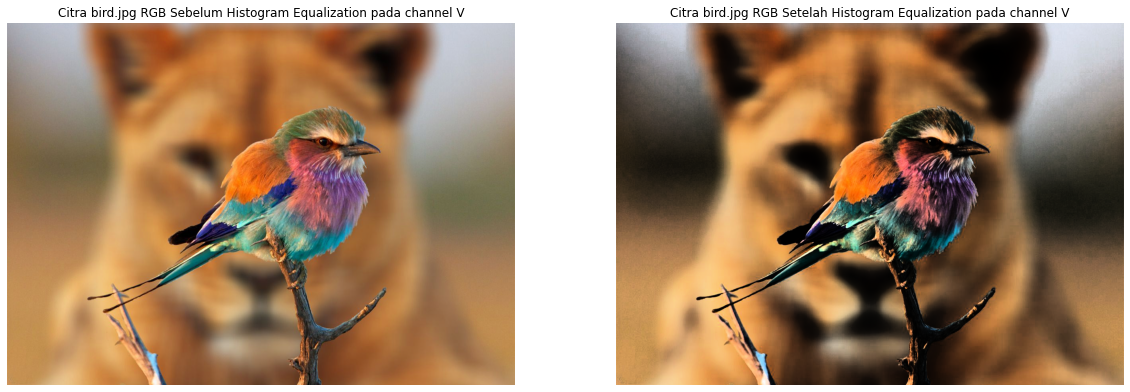

In [20]:
## Menampilkan citra HSV sebelum dan sesudah Histogram Equalization pada channel V
citra_bird_HSV_he = util.img_as_ubyte(color.rgb2hsv(np.zeros(citra_bird_RGB.shape)))
citra_bird_HSV_he[:,:,0] = citra_bird_H
citra_bird_HSV_he[:,:,1] = citra_bird_S
citra_bird_HSV_he[:,:,2] = partisi_citra_bird_HSV_he[0]
citra_bird_HSV_he = color.hsv2rgb(citra_bird_HSV_he)

plt.subplots(figsize=(20,10))
plt.subplot(1,2,1)
plt.title('Citra bird.jpg RGB Sebelum Histogram Equalization pada channel V')
plt.imshow(color.hsv2rgb(citra_bird_HSV))
plt.axis('off')

plt.subplot(1,2,2)
plt.title('Citra bird.jpg RGB Setelah Histogram Equalization pada channel V')
plt.imshow(citra_bird_HSV_he)
plt.axis('off')

##### f. Perbedaan dari citra awal, citra hasil _Histogram Equalization channel_ $\text{RGB}$, dan citra hasil _Histogram Equalization channel_ $\text{V}$

###### RGB Channel
- Berdasarkan penampakan histogram untuk tiap _channel_ $\text{RGB}$ untuk sebelum dilakukan _histogram equalization_ dan sesudah dilakukan _histogram equalization_, persebaran nilainya **"diratakan"**  dengan mengambil:
    - Range $[150,200]$ untuk _Red_ sebagai acuan untuk diratakan dari $[0,255]$.
    - Range $[100,150]$ untuk _Green_ sebagai acuan untuk diratakan dari $[0,255]$.
    - Range $[50,100]$ untuk _Blue_ sebagai acuan untuk diratakan dari $[0,255]$.
- Hal tersebut menyebabkan nilainya tidak terlalu berkumpul di bagian-bagian tertentu saja untuk tiap-tiap channel $\text{R}$, $\text{G}$, $\text{B}$.

###### V Channel
- Berdasarkan penampakan histogram untuk tiap _channel_ $\text{V}$ untuk sebelum dilakukan _histogram equalization_ dan sesudah dilakukan _histogram equalization_, persebaran nilainya **"juga diratakan"** dengan mengambil range $[120,220]$ untuk _Value_ sebagai acuan untuk diratakan dari $[0,255]$ sehingga nilainya tidak terlalu berkumpul di bagian-bagian tertentu saja untuk channel $\text{V}$.